<h1>MENSAJES TÓXICOS EN YOU TUBE</h1>

<h6>Este cuaderno es un ejemplo de análisis exploratorio de datos (EDA por sus siglas en inglés) ejecutado sobre el dataset YOUTOXIC_ENGLISH_1000-CSV donde se recogen datos de mensajes de la plataforma de youtube.

El ejercicio consiste en plotear gráficas interesantes buscando patrones relevantes que pudieran ser útiles en la predicción de alquileres de viviendas con fines vacacionales</h6>



<h2>Estas son las variables por entrada que contiene este dataset:</h2>
<ul>
    <li><b>CommentId: </b>Comentario Id</li>
    <li><b>VideoId: </b>Video Id</li>
    <li><b>Text: </b>Texto</li>
    <li><b>isToxic: </b>Es tóxico</li>
    <li><b>IsThreat: </b>Es una amenaza</li>
    <li><b>IsProvocative: </b>Es provocativo</li>
    <li><b>IsObscene: </b>Es obsceno</li>
    <li><b>IsHatespeech: </b>Es discurso de odio</li>
    <li><b>IsRacist: </b>Es racista</li>
    <li><b>IsNationalist: </b>Es nacionalista</li>
    <li><b>IsSexist: </b>Es sexista</li>
    <li><b>IsHomophobic: </b>Es homófobo</li>
    <li><b>IsReligiousHate: </b>Es de odio religioso</li>
    <li><b>IsRadicalism: </b>Es radical</li>
</ul>

In [1]:
# Importar librerías básicas análisis de datos
import pandas as pd
import numpy as np
import re, string
import emoji

#Librerias NLP
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Librerías entrenamiento de modelos
from sklearn.model_selection import train_test_split

In [5]:
#!pip install emoji

In [7]:
#!pip install spacy
#!pip install nltk
#!python -m spacy download en_core_web_sm # --> pipeline en ingles
#!pip install scikit-learn

# Exploración inicial del dataset

In [50]:
df = pd.read_csv('youtoxic_english_1000.csv')
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# formato de los datos
df.dtypes

CommentId          object
VideoId            object
Text               object
IsToxic              bool
IsAbusive            bool
IsThreat             bool
IsProvocative        bool
IsObscene            bool
IsHatespeech         bool
IsRacist             bool
IsNationalist        bool
IsSexist             bool
IsHomophobic         bool
IsReligiousHate      bool
IsRadicalism         bool
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [7]:
# Conocer datos nulos
df.isnull().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [8]:
# Datos estadísticos
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [9]:
# Descripción de columnas
df.columns

Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.corr()

/tmp/ipykernel_27652/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
IsToxic,1.000000,0.797086,0.158048,0.472718,0.359707,0.431774,0.407869,0.096908,0.034142,NaN,0.118928,NaN
IsAbusive,0.797086,1.000000,0.198282,0.593057,0.451277,-0.119603,-0.121005,-0.042843,0.042833,NaN,-0.042970,NaN
IsThreat,0.158048,0.198282,1.000000,0.106626,-0.048820,0.002063,-0.034268,-0.013152,-0.004634,NaN,0.111962,NaN
IsProvocative,0.472718,0.593057,0.106626,1.000000,0.089788,-0.072719,-0.075072,-0.008796,-0.013860,NaN,0.001699,NaN
IsObscene,0.359707,0.451277,-0.048820,0.089788,1.000000,-0.027061,-0.035277,-0.029934,0.094916,NaN,-0.036736,NaN
IsHatespeech,0.431774,-0.119603,0.002063,-0.072719,-0.027061,1.000000,0.944637,0.224442,0.079074,NaN,0.275440,NaN
IsRacist,0.407869,-0.121005,-0.034268,-0.075072,-0.035277,0.944637,1.000000,0.237595,-0.011958,NaN,0.013885,NaN
IsNationalist,0.096908,-0.042843,-0.013152,-0.008796,-0.029934,0.224442,0.237595,1.000000,-0.002841,NaN,-0.009897,NaN
IsSexist,0.034142,0.042833,-0.004634,-0.013860,0.094916,0.079074,-0.011958,-0.002841,1.000000,NaN,-0.003487,NaN
IsHomophobic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualización de Datos

In [41]:
# Establecer el porcentaje de una columna de datos de visualización
def porcentaje_grafico(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
                   ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords="offset points")

Categpría del comentario:

IsToxic
False    538
True     462
Name: IsToxic, dtype: int64

IsAbusive
False    647
True     353
Name: IsAbusive, dtype: int64

IsThreat
False    979
True      21
Name: IsThreat, dtype: int64

IsProvocative
False    839
True     161
Name: IsProvocative, dtype: int64

IsObscene
False    900
True     100
Name: IsObscene, dtype: int64

IsHatespeech
False    862
True     138
Name: IsHatespeech, dtype: int64

IsRacist
False    875
True     125
Name: IsRacist, dtype: int64

IsNationalist
False    992
True       8
Name: IsNationalist, dtype: int64

IsSexist
False    999
True       1
Name: IsSexist, dtype: int64

IsHomophobic
False    1000
Name: IsHomophobic, dtype: int64

IsReligiousHate
False    988
True      12
Name: IsReligiousHate, dtype: int64

IsRadicalism
False    1000
Name: IsRadicalism, dtype: int64



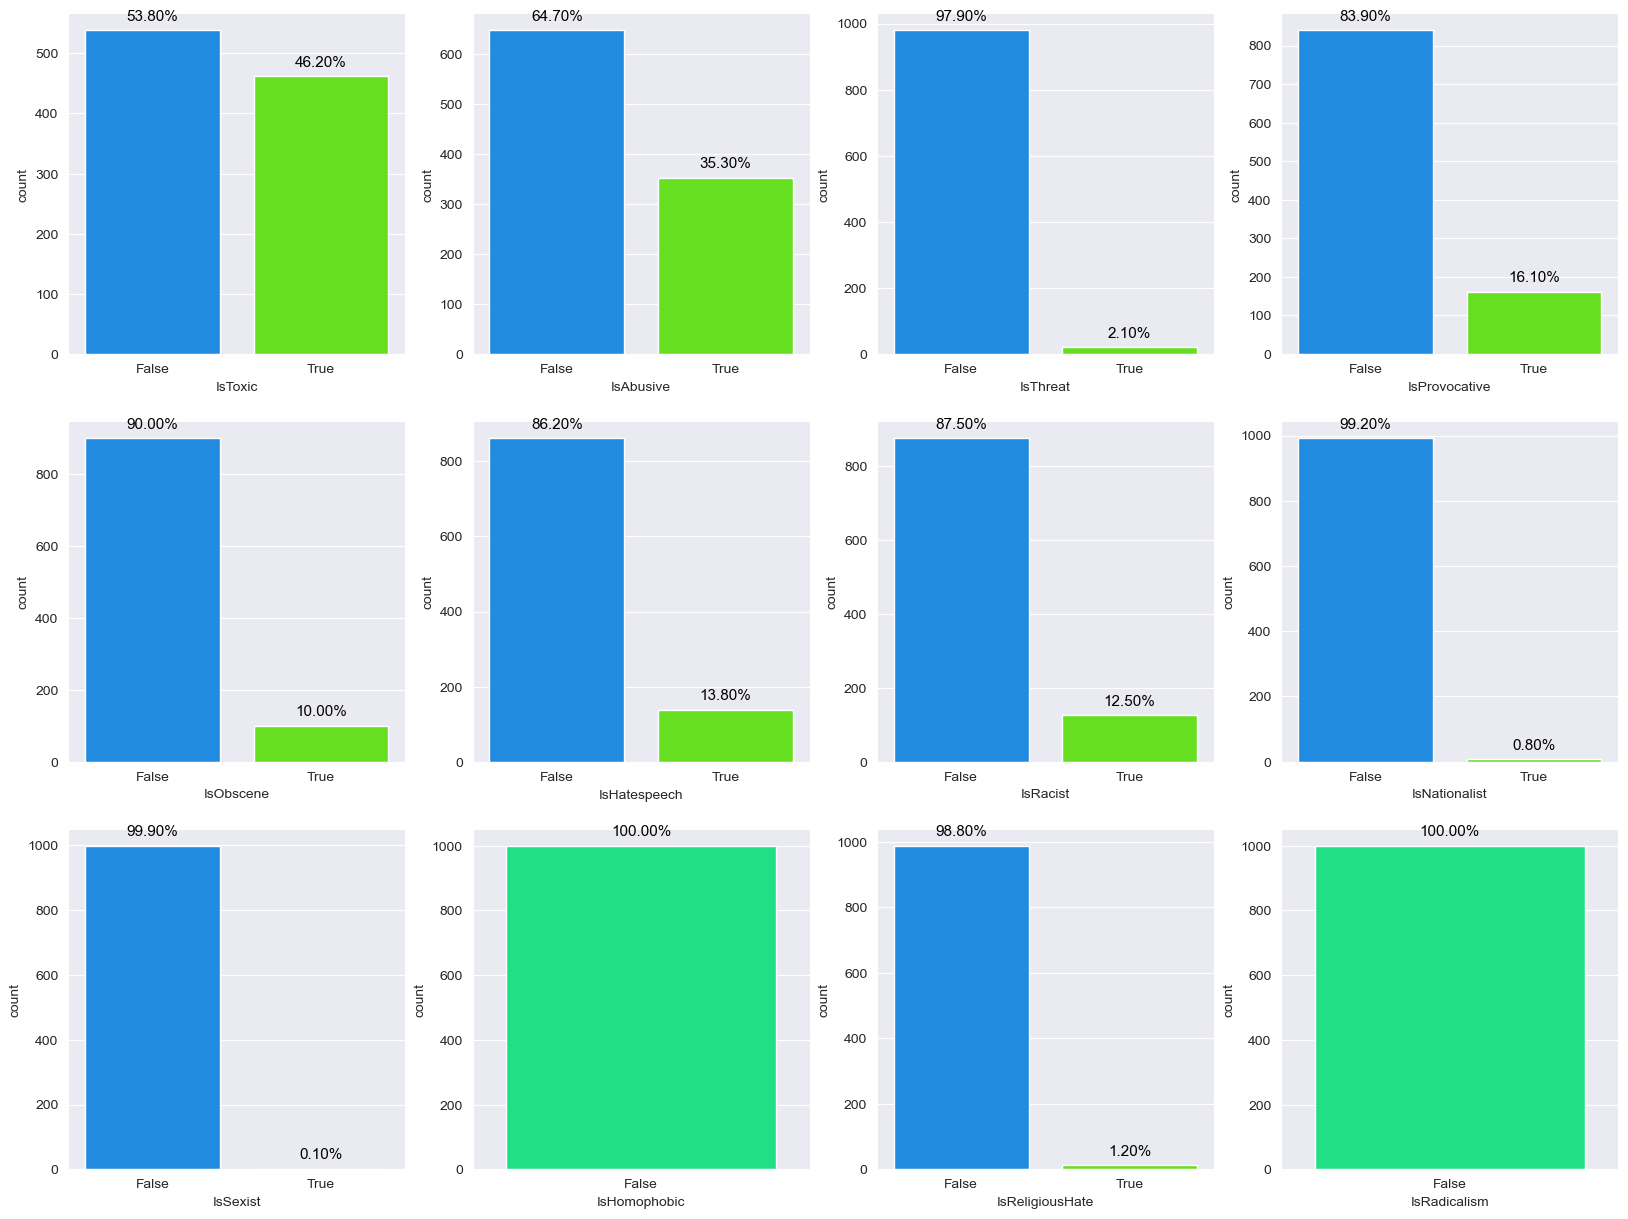

In [42]:
variables_binarias=["IsToxic",'IsAbusive',"IsThreat",  "IsProvocative" , "IsObscene", "IsHatespeech", "IsRacist", "IsNationalist", "IsSexist", "IsHomophobic", "IsReligiousHate", "IsRadicalism" ]
# Conteo de cada una de las categorías.
print(f"Categpría del comentario:")
print()
for col in variables_binarias:
    print(f"{col}")
    print(df[col].value_counts())
    print()

fig,axes=plt.subplots(nrows=3,ncols=4,figsize=(20,15))
for i,item in enumerate(variables_binarias): #enumerate()
    plt.subplot(3,4,(i+1))
    ax = sns.countplot(x=item,data=df,palette="gist_rainbow_r")
    plt.xlabel(str(item))
    #plt.title("Categorias de Toxicidad "+str(item))
    i=i+1
    porcentaje_grafico(ax)
plt.show()

* # Número de comentarios por Id del video

In [7]:
df.Text.value_counts()
#como detectar el id de esos repetidos

run them over                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [31]:
df.VideoId.value_counts()

9pr1oE34bIM    274
04kJtp6pVXI    172
cT14IbTDW2c    146
dG7mZQvaQDk    112
TZxEyoplYbI    104
bUgKZMSxr3E     39
8HB18hZrhXc     38
4rCweDxDqdw     37
Dt9-byUhPdg     34
#NAME?          16
dDbRyFIkNII     10
XRuCW80L9mA     10
5vF4si3hoRA      8
Name: VideoId, dtype: int64

In [ ]:
#Resetear el id de Video para que sea mas legible en el grafico

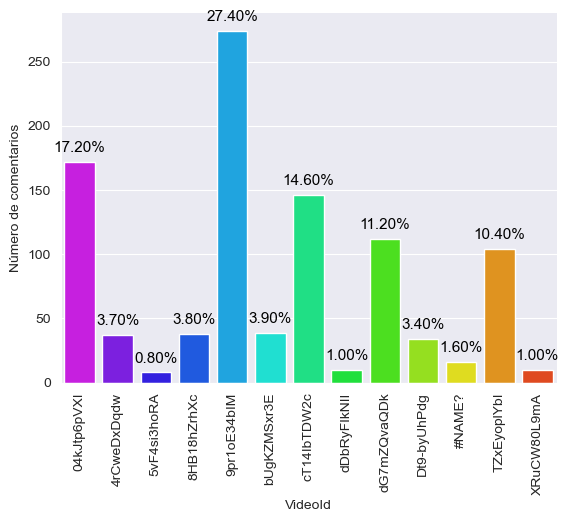

In [32]:
ax = sns.countplot(x="VideoId",data=df, palette="gist_rainbow_r")
plt.ylabel("Número de comentarios")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
    plt.xticks(rotation=90)
plt.show()

In [51]:
# Calcular la columna toxico en base a las columnas booleanas
def crear_columna_Toxico(df):
    df_Toxico = []
    """Se crea la columna Toxico, con la condición --> Si alguna de las categorias existentes tiene al menos un True ,
    entonces el valor de la columna Toxico es True ó 1"""
    for row in range(len(df)):
        if df.iloc[row]["IsToxic"] == True or df.iloc[row]["IsAbusive"] == True or df.iloc[row]["IsThreat"] == True or df.iloc[row]["IsProvocative"] == True   or df.iloc[row]["IsObscene"] == True or df.iloc[row]["IsHatespeech"]  == True or df.iloc[row]["IsRacist"] == True    or df.iloc[row]["IsNationalist"] == True or  df.iloc[row]["IsReligiousHate"] == True  or  df.iloc[row]["IsSexist"] == True:
            df_Toxico.append(1)
        else:
            df_Toxico.append(0)
    df["Toxico"] = df_Toxico
    df = df.drop(['IsToxic', 'IsAbusive', 'IsThreat','IsProvocative', 'IsHatespeech', 'IsObscene','IsRacist', 'IsNationalist', 'IsReligiousHate','IsSexist', "CommentId","VideoId",'IsHomophobic', 'IsRadicalism'], axis=1)
    return df

In [52]:
# Se aplica el metodo de crear la Columna Toxico, y se eliminan las otras categorías.
df =crear_columna_Toxico(df)
df.head(5)

,Text,Toxico
0,If only people would just take a step back and...,0
1,Law enforcement is not trained to shoot to app...,1
2,\nDont you reckon them 'black lives matter' ba...,1
3,There are a very large number of people who do...,0
4,"The Arab dude is absolutely right, he should h...",0


## Procesamiento del texto con NLP (Procesamiento del lenguaje Natural)

In [70]:
#df = pd.read_csv('youtoxic_english_1000.csv')
df =crear_columna_Toxico(df)
df

,Text,Toxico
0,If only people would just take a step back and...,0
1,Law enforcement is not trained to shoot to app...,1
2,\nDont you reckon them 'black lives matter' ba...,1
3,There are a very large number of people who do...,0
4,"The Arab dude is absolutely right, he should h...",0
...,...,...
995,I remember that they sent in the national defe...,0
996,Stats don`t represent the problem. Race baitin...,1
997,The quote from the mother... Wow that hit hard...,0
998,this video is so racist,0


In [71]:
def minusculas(text):
    text_limpio = text.lower()
    return text_limpio

In [78]:
## Eliminar tildes y caracteres especiales
def caracteres(text):
    '''Remove punctuation and remove words containing numbers.'''

    text = re.sub('.*?¿', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    re.sub('[0-9]+', '', text)
    return text

In [161]:
def limpieza_texto(text):
    df['Text'] = df['Text'].apply(minusculas)
    df['Text'] = df['Text'].apply(caracteres)
    return df

### Vamos a aplicar los dos métodos anteriores:
* Convertir comentarios a minúsculas
* Eliminar caracteres especiales y signos de puntuación.

In [118]:
df = limpieza_texto(df)
df

,Text,Toxico,tokens
0,if only people would just take a step back and...,0,people step case not people situation lump ...
1,law enforcement is not trained to shoot to app...,1,law enforcement train shoot apprehend train...
2,dont you reckon them black lives matter banner...,1,not reckon black life matter banner hold white...
3,there are a very large number of people who do...,0,large number people like police officer call c...
4,the arab dude is absolutely right he should ha...,0,arab dude absolutely right shot extra time ...
...,...,...,...
995,i remember that they sent in the national defe...,0,remember send national defence
996,stats dont represent the problem race baiting ...,1,stat not represent problem race bait attitude ...
997,the quote from the mother wow that hit hard ve...,0,quote mother wow hit hard accurate
998,this video is so racist,0,video racist


In [107]:
df

,Text,Toxico,tokens
0,if only people would just take a step back and...,0,people step case not people situation lump...
1,law enforcement is not trained to shoot to app...,1,law enforcement train shoot apprehend train...
2,dont you reckon them black lives matter banner...,1,not reckon black life matter banner hold white...
3,there are a very large number of people who do...,0,large number people like police officer call c...
4,the arab dude is absolutely right he should ha...,0,arab dude absolutely right shot extra time ...
...,...,...,...
995,i remember that they sent in the national defe...,0,remember send national defence
996,stats dont represent the problem race baiting ...,1,stat not represent problem race bait attitude ...
997,the quote from the mother wow that hit hard ve...,0,quote mother wow hit hard accurate
998,this video is so racist,0,video racist


# Tokenizar

In [108]:
nlp = spacy.load("en_core_web_sm")
df["tokens"] = df["Text"].apply(lambda x: nlp.tokenizer(x))
df

,Text,Toxico,tokens
0,if only people would just take a step back and...,0,"(if, only, people, would, just, take, a, step,..."
1,law enforcement is not trained to shoot to app...,1,"(law, enforcement, is, not, trained, to, shoot..."
2,dont you reckon them black lives matter banner...,1,"(do, nt, you, reckon, them, black, lives, matt..."
3,there are a very large number of people who do...,0,"(there, are, a, very, large, number, of, peopl..."
4,the arab dude is absolutely right he should ha...,0,"(the, arab, dude, is, absolutely, right, he, s..."
...,...,...,...
995,i remember that they sent in the national defe...,0,"(i, remember, that, they, sent, in, the, natio..."
996,stats dont represent the problem race baiting ...,1,"(stats, do, nt, represent, the, problem, race,..."
997,the quote from the mother wow that hit hard ve...,0,"(the, quote, from, the, mother, wow, that, hit..."
998,this video is so racist,0,"(this, video, is, so, racist)"


# Stop World

In [109]:
def eliminar_stop_words(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    return " ".join(token for token in tokens)

# Lematizacion

In [110]:
def lematizar(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return " ".join(token for token in tokens)


### Vamos a aplicar los dos métodos anteriores:
* Eliminar las "palabras vacías" o "stop words"
* Lematizar.

In [24]:
def sw_lem(text):
    df['tokens'] = df['tokens'].apply(eliminar_stop_words)
    df['tokens'] = df['tokens'].apply(lematizar)
    return df

In [119]:
df = limpieza_texto(df)
df["tokens"] = df["Text"].apply(lambda x: nlp.tokenizer(x))
df = sw_lem(df)

In [120]:
df = sw_lem(df)
df

,Text,Toxico,tokens
0,if only people would just take a step back and...,0,people step case not people situation lump ...
1,law enforcement is not trained to shoot to app...,1,law enforcement train shoot apprehend train...
2,dont you reckon them black lives matter banner...,1,not reckon black life matter banner hold white...
3,there are a very large number of people who do...,0,large number people like police officer call c...
4,the arab dude is absolutely right he should ha...,0,arab dude absolutely right shot extra time ...
...,...,...,...
995,i remember that they sent in the national defe...,0,remember send national defence
996,stats dont represent the problem race baiting ...,1,stat not represent problem race bait attitude ...
997,the quote from the mother wow that hit hard ve...,0,quote mother wow hit hard accurate
998,this video is so racist,0,video racist


In [ ]:
#Quitar urls de los comentarios NO SE COMO HACERLO
#Convertir números en texto YA
#Quitar barras invertidas YA
#Quitar espacios en blanco NO FUNCIONA
#Revisar abreviaturas para que se eliminen efectivamente como stops worlds YA
# Eliminar emojis YA

# Modelos de Machine Learning

# Separar dataset para el entrenamiento

In [121]:
X= df['tokens']
y= df['Toxico']

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=101, stratify=y)

In [123]:
X_train

810    old white conservative say peggy vice presiden...
817                               love thug deserve slug
920    not race issue police brutality issue time cop...
32                                 massri need education
493    public school terrible problem kid attend publ...
                             ...                        
449    not wait jesus come care b s m get sick tired ...
101    wonder police expect happen continually abuse ...
207    slow not tell speed ms scully talk quickly gre...
364    educate dumb assss rap rap real people like di...
435                            far base not propaganda b
Name: tokens, Length: 800, dtype: object

In [116]:
X_test

915    not want justice    mob mentality action    s ...
636                         weak display law enforcement
790    m sure michael brown know killer young girl co...
455    dear mr stefan molyneux not add video michael ...
261    typical mindset white people    white people d...
                             ...                        
98     cnnso touchclose idiot people watch comedy rep...
946    not cop armed civil war    machine gun unarmed...
356    true police originally say robbery stop    cla...
84                     act like animal treat like animal
683          gas grenade pepper spray knight stick apply
Name: tokens, Length: 200, dtype: object

# Vectorizar
Utilizaremos `TfidfVectorizer` para crear vectores de los datos textuales.

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'w{1,}',
    ngram_range=(1, 3),
    stop_words='english',
    sublinear_tf=True)

In [31]:
vect

TfidfVectorizer(ngram_range=(1, 3), stop_words='english',
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='w{1,}')

# Se aplica la función vectorizar a los datasets de train y test

In [124]:
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

# Algoritmos de ML clasificacion (no-ensemble)
### * Naïve Bayes
### * Máquinas de vectores de soporte
### * Regresión logística
### * Árboles de decisión
### * Vecinos más cercanos


In [35]:
#Arbol de decision
from sklearn.tree import DecisionTreeClassifier
#Regresión logística
from sklearn.linear_model import LogisticRegression
#KML
from sklearn.neighbors import KNeighborsClassifier
#SVR
from sklearn.svm import SVC
#NAive Bayes
from sklearn.naive_bayes import GaussianNB

In [36]:
## Métricas de evaluación

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [37]:
def train_evaluate(nombre_modelo,modelo):
    #Instanciación del modelo
    mod= modelo()
    # Entrenamiento del modelo
    mod.fit(X_train, y_train)

    #Prediccion y evaluación del modelo
    y_predict= mod.predict(X_test)
    y_predict_train= mod.predict(X_train)

    #Métricas de Evaluación
    accuracy= accuracy_score(y_test, y_predict)
    accuracy_train= accuracy_score(y_train, y_predict_train)
    recall= recall_score(y_test, y_predict)
    f1= f1_score(y_test, y_predict)
    ROC= roc_auc_score(y_test, y_predict)
    print(nombre_modelo)
    print("-----------------------------------------------------")
    print("F1_score: {:.2f} %".format(100 * f1))
    print("-----------------------------------------------------")
    print("Recall: {:.2f} %".format(100 * recall))
    print("-----------------------------------------------------")
    print("ROC: {:.2f} %".format(100 * ROC))
    print("-----------------------------------------------------")
    print("Accuracy_test es: {:.2f} %".format(100 * accuracy))
    print("-----------------------------------------------------")
    print("Accuracy_train es: {:.2f} %".format(100 * accuracy_train))
    print("-----------------------------------------------------")
    print("Overfitting {:.2f} % ".format(((accuracy - accuracy_train)/accuracy) *100))
    print("-----------------------------------------------------")
    print("Matriz de confusión:")
    #print("-----------------------------------------------------")

    Labels= 'Sin Odio', 'Con Odio'
    conf_matrix = confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
    #plt.title("Matriz de confusión")
    plt.ylabel('True class')
    plt.xlabel('Predicted Class')
    plt.show()
    print("-----------------------------------------------------")
    print("Reporte de Clasificación (test)")
    print("-----------------------------------------------------")
    print (classification_report(y_test, y_predict))

    #train_evaluate(y_test, y_predict)
    print("-----------------------------------------------------")
    print("Reporte de Clasificación (train)")
    print("-----------------------------------------------------")
    print (classification_report(y_train,y_predict_train))
    print("-----------------------------------------------------")

In [211]:
#train_evaluate("Logistic Regression", LogisticRegression)
#train_evaluate("SVM", SVC)
#train_evaluate("Decission Tree", DecisionTreeClassifier)
#train_evaluate("Naive Bayes", GaussianNB)
#train_evaluate("KNN", KNeighborsClassifier)


In [212]:
#train_evaluate("Naive Bayes", GaussianNB)

In [213]:
#train_evaluate("Decission Tree", DecisionTreeClassifier)

In [214]:
#train_evaluate("KNN", KNeighborsClassifier)

In [215]:
#train_evaluate("SVM", SVC)

# Algoritmos Ensamble
### * GradientBoost ---> GradientBoostClassifier
### * Ramdom Forest ---> Ramdom ForestClassifier
### * AdaBoost ---> AdaBoostClassifier
### * XgBoost ----> XgBoostClassifier
### * LgBoost--->LGBMClassifier(),
### * CatBoost--->CatBoostClassifier(verbose=False)

In [41]:
# Algoritmos de ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
#import lightgbm
import catboost
#from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [216]:
#train_evaluate("Random Forest", RandomForestClassifier)
#train_evaluate("Gradient Boosting Regressor", GradientBoostingClassifier)
#train_evaluate("AdaBoost Classifier", AdaBoostClassifier)
#train_evaluate("XgBoost Classifier", XGBClassifier)
#train_evaluate("LightGBM Classifier", LGBMClassifier)
#train_evaluate("CatBoost Classifier", CatBoostClassifier)


In [217]:
#train_evaluate("Gradient Boosting Classifier", GradientBoostingClassifier)

In [218]:
#train_evaluate("AdaBoost Regressor", AdaBoostClassifier)

In [219]:
#train_evaluate("CatBoost Classifier", CatBoostClassifier)

In [220]:
#train_evaluate("XgBoost Classifier", XGBClassifier)